Bayesian Information Criterion: 50.21824821939818
Davies-Bouldin Index: 0.2893792767901513
Silhouette Score: 0.7827738719266039
Calinski-Harabasz Index: 630.8235586596012
Cluster Membership: [0 2 1 0 2 2 1 0 2 1 0 0 2 0 2 2 1 1 1 1 0 1 2 2 2 2 1 0 2 2 1 0 1 1 0 0 0
 1 0 1 2 1 2 2 1 0 0 0 0 1]


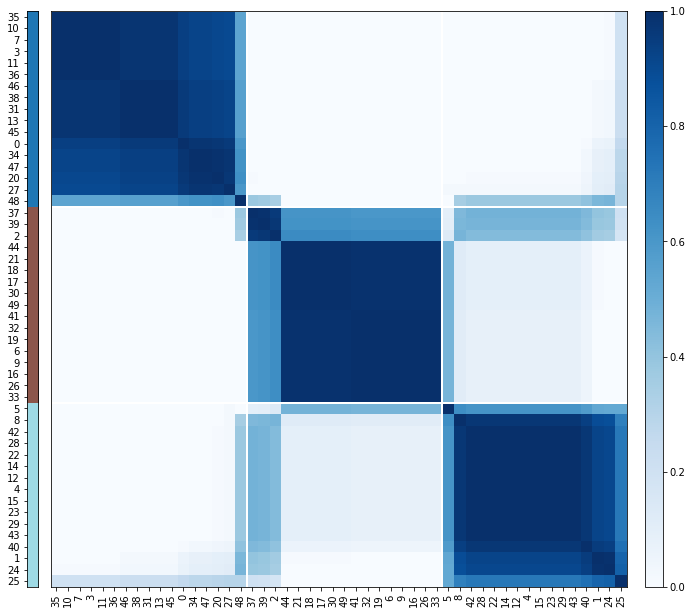

In [6]:
from pyckmeans import CKmeans

# simulate dataset
# 50 samples, 2 features, 3 true clusters
import sklearn.datasets
x, _ = sklearn.datasets.make_blobs(n_samples=50, n_features=2, centers=3, random_state=75)

# apply Consensus K-Means
# 3 clusters, 100 K-Means runs,
# draw 80% of samples and 50% of features for each single K-Means
ckm = CKmeans(k=3, n_rep=100, p_samp=0.8, p_feat=0.5)
ckm.fit(x)
ckm_res = ckm.predict(x)

# plot consensus matrix and consensus clustering
ckm_res.plot(figsize=(10,10))

# consensus matrix
ckm_res.cmatrix

# clustering metrics
print('Bayesian Information Criterion:', ckm_res.bic)
print('Davies-Bouldin Index:', ckm_res.db)
print('Silhouette Score:', ckm_res.sil)
print('Calinski-Harabasz Index:', ckm_res.ch)

# consensus clusters
print('Cluster Membership:', ckm_res.cl)

Metrics:
   k       sil         bic        db          ch
0  2  0.482574  239.460723  0.871689   32.825144
1  3  0.788207  126.358519  0.302979  387.409107
2  4  0.575898  127.955347  0.467056  265.484065
3  5  0.559593  129.602446  0.499747  204.332168


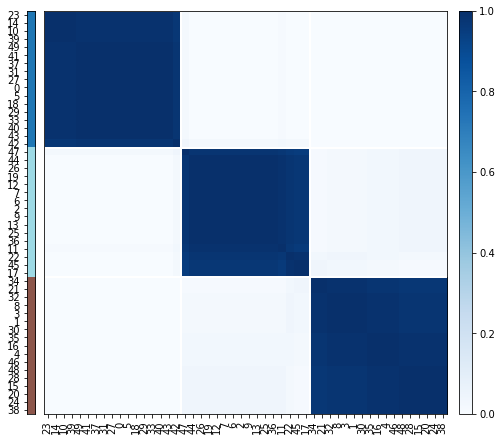

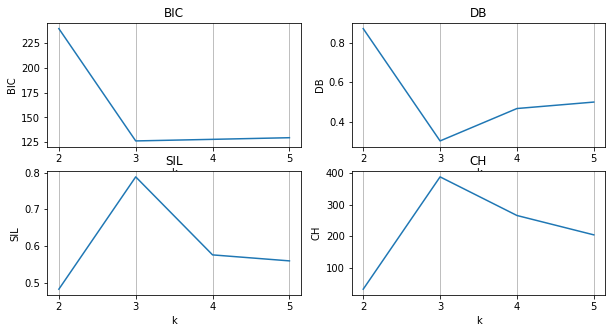

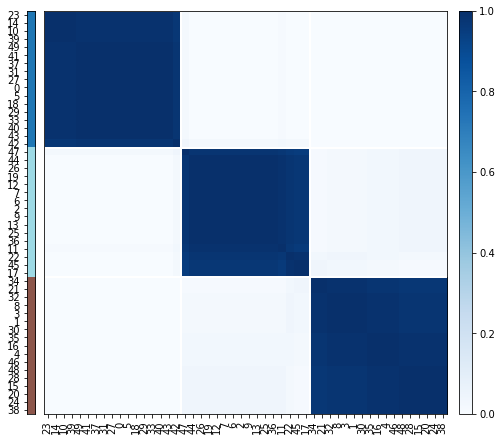

In [8]:
from pyckmeans import MultiCKMeans
import sklearn.datasets

# simulate dataset
# 50 samples, 10 features, 3 true clusters
x, _ = sklearn.datasets.make_blobs(n_samples=50, n_features=10, centers=3, random_state=44)

# apply multiple Consensus K-Means for
# k = 2, ..., 5
# 100 K-Means runs per Consensus K-Means
# draw 80% of the sample for each single K-Means
# draw 50% of the features for each single K-Means
mckm = MultiCKMeans(k=[2, 3, 4, 5], n_rep=100, p_samp=0.8, p_feat=0.5)
mckm.fit(x)
mckm_res = mckm.predict(x)

# consensus clusters
print('Metrics:')
print(mckm_res.metrics)

# plot consensus matrix and consensus clustering
# BIC, DB: lower is better
# SIL, CH: higher is better
mckm_res.plot_metrics(figsize=(10,5))


# get a single CKmeansResult                  0 |1| 2  3
ckm_res_k3 = mckm_res.ckmeans_results[1] # k=[2, 3, 4, 5]
ckm_res_k3.plot()